In [1]:
%matplotlib inline
import pandas as pd
import glob
import proplot as pplt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects
#import ternary
import scipy as scp
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.cm as cm

pplt.rc.update({'xtick.major.size':6,
'xtick.minor.size':3.5,
'ytick.major.size':6,
'ytick.minor.size':3.5,
'tick.dir':'in',
'tick.labelsize':12,
'legend.columnspacing':0.1,
'legend.handletextpad':0.1,
'axes.labelsize':14,
'legend.fontsize':11,
#'cycle':'tab10'
})

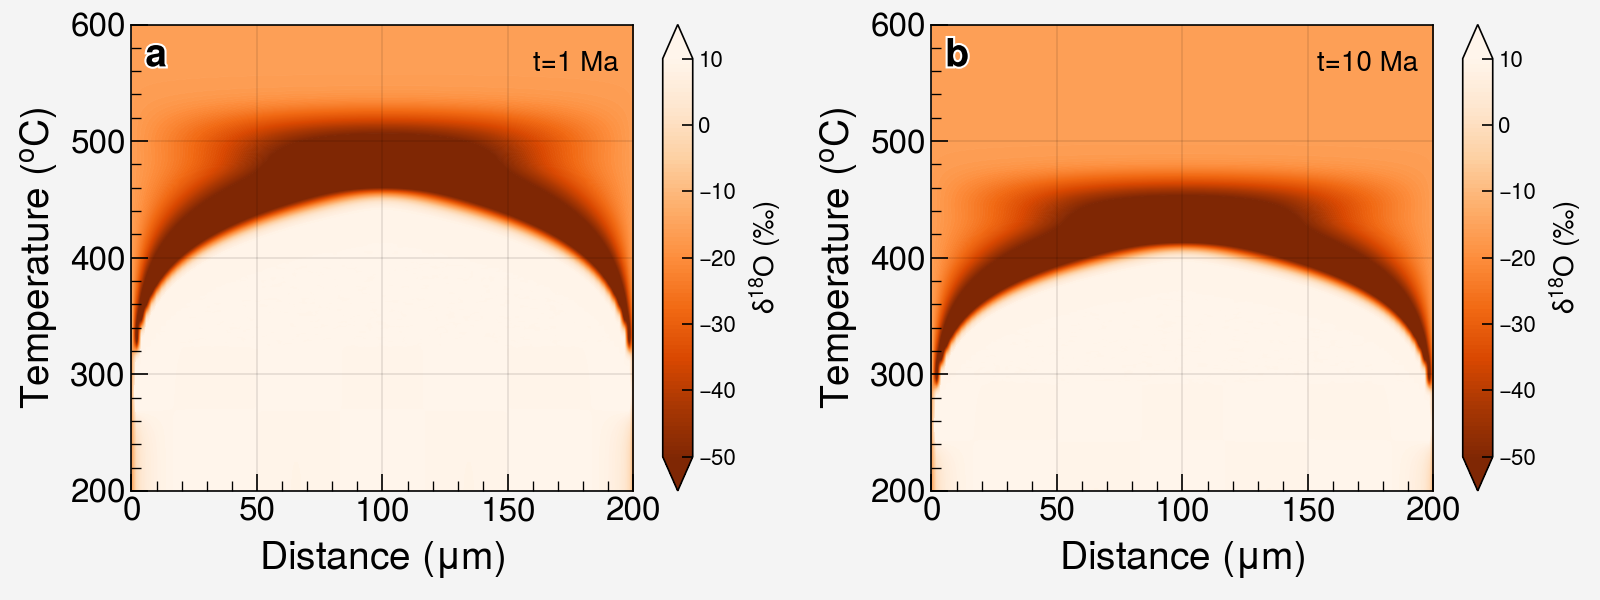

In [2]:
t=1e6*365*24*3600
c0=0.2e4
c1=4e4
h=200

d0=10
d1=-16
rsmow=0.0020052
c0D=(d0/1000+1)*c0*rsmow
c1D=(d1/1000+1)*c1*rsmow

fig,axs=pplt.subplots(ncols=2,nrows=1,figsize=(8,3),share=False)

#D0=np.array([10**2.24,10**1.11,np.exp(-7.3)/10000])[0]
#E=(np.array([374,334,118])*1e3)[0]
R=8.314
T=np.arange(200,601,1)
x=np.linspace(0,h,100)

x1,T1,j=np.meshgrid(x*1e-6,T+273.15,np.arange(0,300))
#D=D0*np.exp(-E/(R*T1))
DD=9e-9*np.exp(-49*4.184e3/R/T1) # diffusion coefficient of 2H
D=DD*np.sqrt(18/16) # diffusion coefficient of 1H

#######(a) dD varying with distance and temperature

sigma=4/(2*j+1)/np.pi*np.sin(((2*j+1)*np.pi*x1)/h*1e6)*np.exp(-(((2*j+1)*np.pi)/h*1e6)**2*D*t)
sumj=sigma.sum(axis=2)
c=c1+(c0-c1)*sumj

sigmaD=4/(2*j+1)/np.pi*np.sin(((2*j+1)*np.pi*x1)/h*1e6)*np.exp(-(((2*j+1)*np.pi)/h*1e6)**2*DD*t)
sumjD=sigmaD.sum(axis=2)
cD=c1D+(c0D-c1D)*sumjD

dD=(cD/c/rsmow-1)*1000

m=axs[0].contourf(x,T,dD,levels=np.linspace(-50,10,100),cmap='Oranges_r',extend='both')
axs[0].colorbar(m,loc='r',ticks=np.arange(-50,11,10),minorlocator=10,label=r'$\mathrm{\delta ^{18}O\ (‰)}$',width=0.15,pad=0.06,
                ticklabelsize=8,labelsize=10)
axs[0].text(0.97,0.9,'t=1 Ma',transform=axs[0].transAxes,fontsize=10,ha='right',c='k')
axs[0].format(xlim=(0,h),xlabel=r'$\mathrm{Distance\ ({\mu}m)}$',ylabel=r'$\mathrm{Temperature\ ({^o}C)}$')

##### (b)

t=10e6*365*24*3600

sigma=4/(2*j+1)/np.pi*np.sin(((2*j+1)*np.pi*x1)/h*1e6)*np.exp(-(((2*j+1)*np.pi)/h*1e6)**2*D*t)
sumj=sigma.sum(axis=2)
c=c1+(c0-c1)*sumj

sigmaD=4/(2*j+1)/np.pi*np.sin(((2*j+1)*np.pi*x1)/h*1e6)*np.exp(-(((2*j+1)*np.pi)/h*1e6)**2*DD*t)
sumjD=sigmaD.sum(axis=2)
cD=c1D+(c0D-c1D)*sumjD

dD=(cD/c/rsmow-1)*1000

m=axs[1].contourf(x,T,dD,levels=np.linspace(-50,10,100),cmap='Oranges_r',extend='both')
axs[1].colorbar(m,loc='r',ticks=np.arange(-50,11,10),minorlocator=10,label=r'$\mathrm{\delta ^{18}O\ (‰)}$',width=0.15,pad=0.06,
                ticklabelsize=8,labelsize=10)
axs[1].text(0.97,0.9,'t=10 Ma',transform=axs[1].transAxes,fontsize=10,ha='right',c='k')
axs[1].format(xlim=(0,h),xlabel=r'$\mathrm{Distance\ ({\mu}m)}$',ylabel=r'$\mathrm{Temperature\ ({^o}C)}$')

axs.format(abc='a',abcloc='ul',abc_kw={'fontsize':14})
#fig.savefig('d18O-diffusion.jpg',dpi=600)

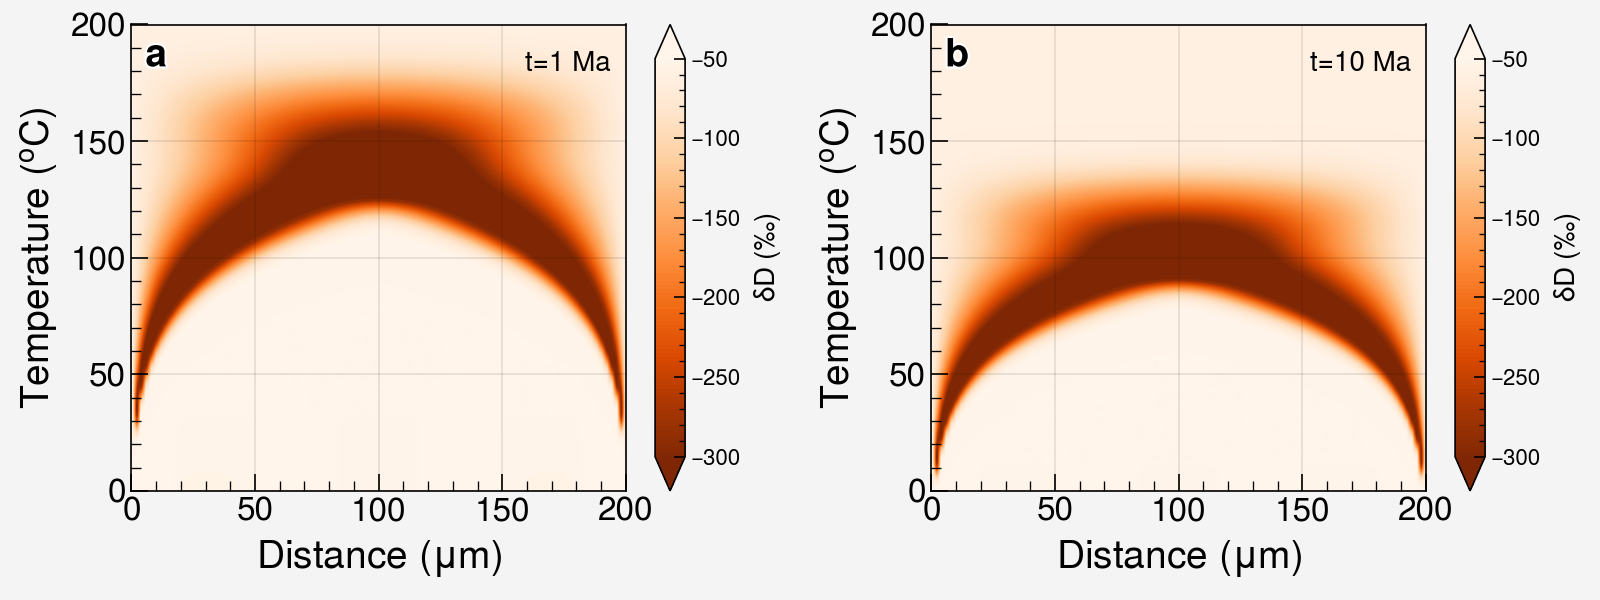

In [3]:
t=1e6*365*24*3600
c0=0.2e4
c1=4e4
h=200

d0=-50
d1=-60
rsmow=155.76e-6
c0D=(d0/1000+1)*c0*rsmow
c1D=(d1/1000+1)*c1*rsmow

fig,axs=pplt.subplots(ncols=2,nrows=1,figsize=(8,3),share=False)

#D0=np.array([10**2.24,10**1.11,np.exp(-7.3)/10000])[0]
#E=(np.array([374,334,118])*1e3)[0]
R=8.314
T=np.arange(0,201,1)
x=np.linspace(0,h,100)

x1,T1,j=np.meshgrid(x*1e-6,T+273.15,np.arange(0,300))
#D=D0*np.exp(-E/(R*T1))
DD=6.71e-13*np.exp(-80.5e3/R/T1) # diffusion coefficient of 2H
D=DD*np.sqrt(2) # diffusion coefficient of 1H

#######(a) dD varying with distance and temperature

sigma=4/(2*j+1)/np.pi*np.sin(((2*j+1)*np.pi*x1)/h*1e6)*np.exp(-(((2*j+1)*np.pi)/h*1e6)**2*D*t)
sumj=sigma.sum(axis=2)
c=c1+(c0-c1)*sumj

sigmaD=4/(2*j+1)/np.pi*np.sin(((2*j+1)*np.pi*x1)/h*1e6)*np.exp(-(((2*j+1)*np.pi)/h*1e6)**2*DD*t)
sumjD=sigmaD.sum(axis=2)
cD=c1D+(c0D-c1D)*sumjD

dD=(cD/c/rsmow-1)*1000

m=axs[0].contourf(x,T,dD,levels=np.linspace(-300,-50,100),cmap='Oranges_r',extend='both')
axs[0].colorbar(m,loc='r',ticks=np.arange(-300,-49,50),minorlocator=10,label=r'$\mathrm{\delta D\ (‰)}$',width=0.15,pad=0.06,
                ticklabelsize=8,labelsize=10)
axs[0].text(0.97,0.9,'t=1 Ma',transform=axs[0].transAxes,fontsize=10,ha='right',c='k')
axs[0].format(xlim=(0,h),xlabel=r'$\mathrm{Distance\ ({\mu}m)}$',ylabel=r'$\mathrm{Temperature\ ({^o}C)}$')

##### (b)

t=10e6*365*24*3600

sigma=4/(2*j+1)/np.pi*np.sin(((2*j+1)*np.pi*x1)/h*1e6)*np.exp(-(((2*j+1)*np.pi)/h*1e6)**2*D*t)
sumj=sigma.sum(axis=2)
c=c1+(c0-c1)*sumj

sigmaD=4/(2*j+1)/np.pi*np.sin(((2*j+1)*np.pi*x1)/h*1e6)*np.exp(-(((2*j+1)*np.pi)/h*1e6)**2*DD*t)
sumjD=sigmaD.sum(axis=2)
cD=c1D+(c0D-c1D)*sumjD

dD=(cD/c/rsmow-1)*1000

m=axs[1].contourf(x,T,dD,levels=np.linspace(-300,-50,100),cmap='Oranges_r',extend='both')
axs[1].colorbar(m,loc='r',ticks=np.arange(-300,-49,50),minorlocator=10,label=r'$\mathrm{\delta D\ (‰)}$',width=0.15,pad=0.06,
                ticklabelsize=8,labelsize=10)
axs[1].text(0.97,0.9,'t=10 Ma',transform=axs[1].transAxes,fontsize=10,ha='right',c='k')
axs[1].format(xlim=(0,h),xlabel=r'$\mathrm{Distance\ ({\mu}m)}$',ylabel=r'$\mathrm{Temperature\ ({^o}C)}$')

axs.format(abc='a',abcloc='ul',abc_kw={'fontsize':14})
#fig.savefig('dD-diffusion.jpg',dpi=600)

In [5]:
d=pd.read_excel('NCC_I-type_apatite.xlsx',sheet_name='SIMS_EPMA')
d['sams']=d['Sample'].str.split('@',expand=True)[0]
#d=d[(d['d18O']>3)&(d['d18O']<11)&(d['SiO2']<1)&(d['H2O']<1)&(d['dD']<-60)&(d['dD']>-300)&(d['dD_std']<50)&\
#    (~(d['sams'].str.contains(r'durango|qinghu',
#    case=False,regex=True).astype(bool)))]
d=d[(d['d18O']>3)&(d['d18O']<11)&(d['H2O']<1)&(d['dD']<0)&(d['dD']>-300)&(d['dD_std']<50)&\
    (~(d['sams'].str.contains(r'durango|qinghu',
    case=False,regex=True).astype(bool)))]

d.loc[d['Cl']<0.02,'Cl']=0.02
d['Eu*']=d['Eu']/0.058/np.sqrt(d['Sm']/0.153*d['Gd']/0.2055)
d['La/Yb']=d['La']/d['Yb']
d['Cl/H2O']=d['Cl']/d['H2O']
d['F/H2O']=d['F']/d['H2O']
d['LREE']=d[['La','Ce','Pr','Nd']].sum(axis=1)

dI=d[d['Rock']=='I_granite']
dG=d[d['Rock'].str.contains('granite')]
dC=dG[dG['Time']=='C']
dJ=dG[dG['Time'].str.contains('J')]

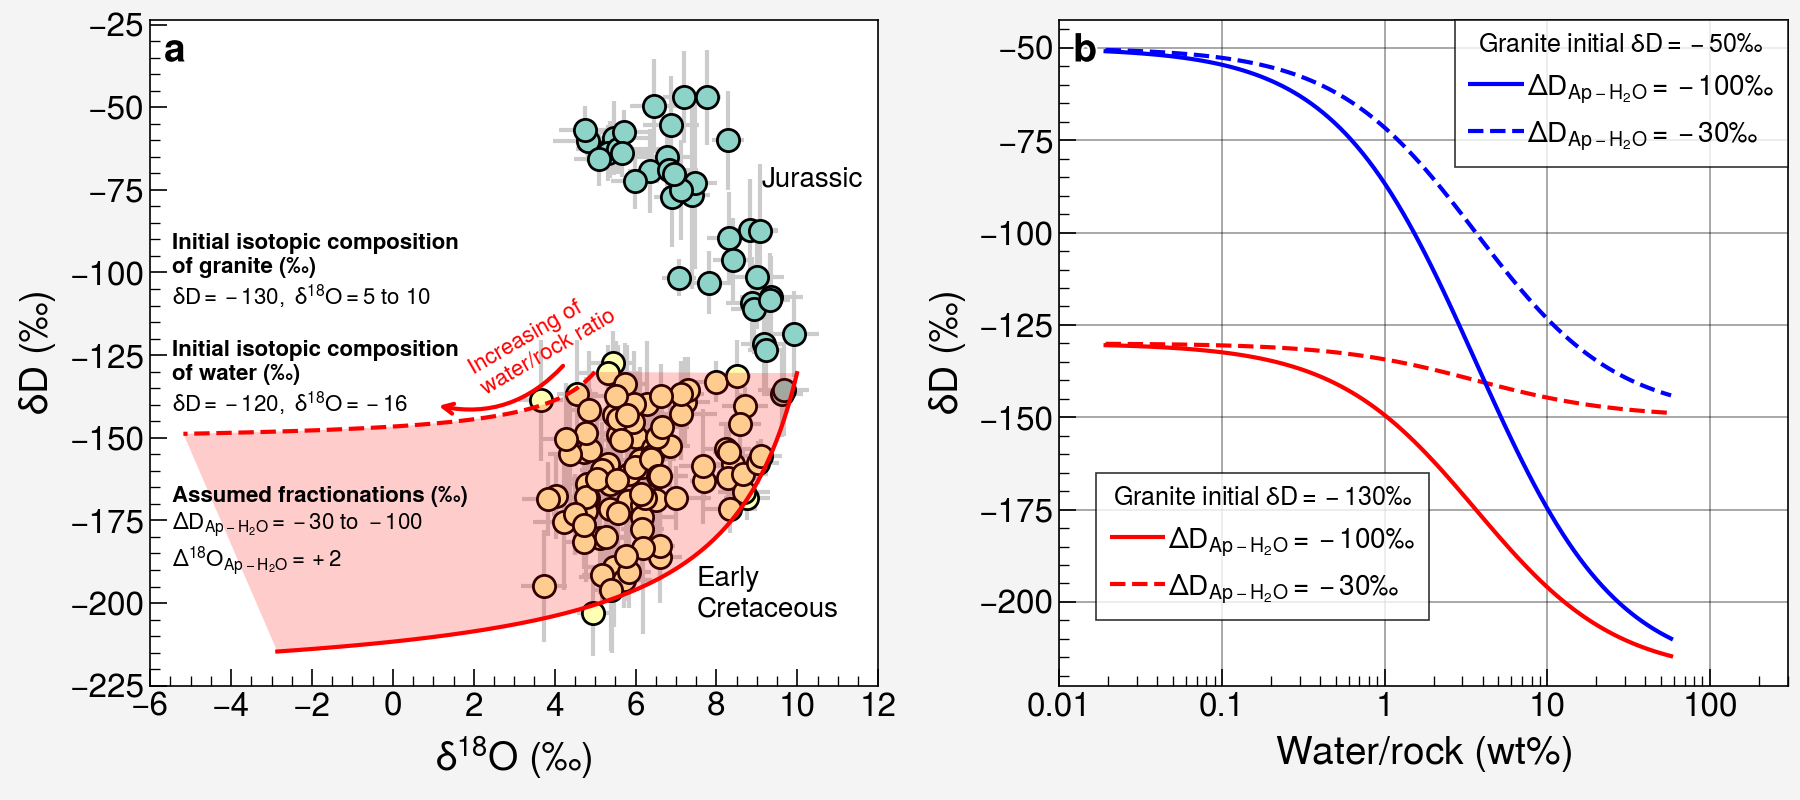

In [6]:
## water-Apatite interaction
Vr=np.logspace(np.log10(0.05/100),np.log10(150/100),100) # water-rock ratio in weight unit, References: Taylor, 1977, JGSL
#Vr=np.linspace(0.01/100,150/100,20)

Mr=Vr/2.6
#wr_ro=89/38*Mr
wr_ro=2*Mr
#wr_ro=np.log(wr_ro+1)
wr_rd=11/0.4*Mr
#wr_rd=np.log(wr_rd+1)

d18O_wi=-16; dD_wi=-120

#alpha_O=1.015; D18O_f=1000*np.log(alpha_O); 
#alpha_D=1.015; DD_f=1000*np.log(alpha_D); 
D18O_f=2; DD_f=-100
dD_ri=-130
###### line 1
d18O_ri=10; 
d18O_rf=(d18O_ri+wr_ro*(d18O_wi+D18O_f))/(1+wr_ro)
dD_rf=(dD_ri+wr_rd*(dD_wi+DD_f))/(1+wr_rd)
###### line 2
D18O_f=2; DD_f=-30
d18O_ri=5
d18O_rf1=(d18O_ri+wr_ro*(d18O_wi+D18O_f))/(1+wr_ro)
dD_rf1=(dD_ri+wr_rd*(dD_wi+DD_f))/(1+wr_rd)
####### line 2

pplt.rc['cycle']='Set3'
fig,axs=pplt.subplots(ncols=2,nrows=1,figsize=(9,4),spanx=False,share=False)
#axs[0].plot(d18O_rf,dD_rf,c='r',ms=5,marker='o',mfc='white',label='Water-rock interaction',zorder=10)
#axs[0].plot(d18O_rf1,dD_rf1,c='r',ms=5,marker='o',mfc='white',zorder=10)
axs[0].plot(d18O_rf,dD_rf,'r-',label='Water-rock interaction',zorder=10)
axs[0].plot(d18O_rf1,dD_rf1,'r--',zorder=10)
axs[0].fill(np.hstack([d18O_rf,d18O_rf1[::-1]]),np.hstack([dD_rf,dD_rf1[::-1]]),fc='red',alpha=0.2,zorder=9)


axs[0].errorbar(dJ['d18O'],dJ['dD'],xerr=dJ['d18O_std'],yerr=dJ['dD_std'],ls='',capsize=0,
             marker='o',ecolor='0.8',mec='0',ms=8,label='Jurassic')
axs[0].errorbar(dC['d18O'],dC['dD'],xerr=dC['d18O_std'],yerr=dC['dD_std'],ls='',capsize=0,
             marker='o',ecolor='0.8',mec='0',ms=8,label='Early Cretaceous')

#axs[0].errorbar(dJ['d18O'],dJ['dD'],xerr=1,yerr=37,ls='',capsize=0,
#             marker='o',ecolor='0.8',mec='0',ms=8,label='Jurassic')
#axs[0].errorbar(dC['d18O'],dC['dD'],xerr=1,yerr=21,ls='',capsize=0,
#             marker='o',ecolor='0.8',mec='0',ms=8,label='Early Cretaceous')

axs[0].text(0.03,0.3,'Assumed fractionations (‰)\n'+r'$\mathrm{\Delta D_{Ap-H_2O}=-30\ to \ -100}$'+'\n'+r'$\mathrm{\Delta ^{18}O_{Ap-H_2O}=+2}$',
           ha='left',va='top',fontsize=8,weight='bold',transform=axs[0].transAxes,zorder=12)
axs[0].text(0.03,0.68,'Initial isotopic composition\nof granite (‰)\n$\mathrm{\delta D=-130,\ \delta ^{18}O=5\ to\ 10}$',
           ha='left',va='top',fontsize=8,weight='bold',transform=axs[0].transAxes)
axs[0].text(0.03,0.52,'Initial isotopic composition\nof water (‰)\n$\mathrm{\delta D=-120,\ \delta ^{18}O=-16}$',
           ha='left',va='top',fontsize=8,weight='bold',transform=axs[0].transAxes)

axs[0].text(0.84,0.78,'Jurassic',ha='left',va='top',fontsize=10,transform=axs[0].transAxes,zorder=11)
axs[0].text(0.75,0.18,'Early\nCretaceous',ha='left',va='top',fontsize=10,transform=axs[0].transAxes)

#axs[1].annotate('',xytext=(4.5,-98),xy=(2.6,-140),arrowprops=dict(arrowstyle='->',connectionstyle='angle3',color='r',lw=1.5),)
axs[0].annotate('',xy=(1,-140),xytext=(4.3,-127),arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=-0.3',color='r',lw=1.5),)
axs[0].text(1.8,-137,'Increasing of\nwater/rock ratio',fontsize=8,rotation=30,c='r')


axs[1].plot(Mr*100,dD_rf,'r-',label=r'$\mathrm{\Delta D_{Ap-H_2O}=-100‰}$')
axs[1].plot(Mr*100,dD_rf1,'r--',label=r'$\mathrm{\Delta D_{Ap-H_2O}=-30‰}$')
axs[1].legend(ncols=1,loc=(0.05,0.1),fontsize=10,title=r'$\mathrm{Granite\ initial\ \delta D=-130‰}$')

D18O_f=2; DD_f=-100
dD_ri=-50
###### line 1
d18O_ri=10; 
d18O_rf=(d18O_ri+wr_ro*(d18O_wi+D18O_f))/(1+wr_ro)
dD_rf=(dD_ri+wr_rd*(dD_wi+DD_f))/(1+wr_rd)
###### line 2
D18O_f=2; DD_f=-30
d18O_ri=5
d18O_rf1=(d18O_ri+wr_ro*(d18O_wi+D18O_f))/(1+wr_ro)
dD_rf1=(dD_ri+wr_rd*(dD_wi+DD_f))/(1+wr_rd)
hd3=axs[1].plot(Mr*100,dD_rf,'b-',label=r'$\mathrm{\Delta D_{Ap-H_2O}=-100‰}$')
hd4=axs[1].plot(Mr*100,dD_rf1,'b--',label=r'$\mathrm{\Delta D_{Ap-H_2O}=-30‰}$')
axs[1].legend(handles=[hd3,hd4],ncols=1,loc='ur',fontsize=10,title=r'$\mathrm{Granite\ initial\ \delta D=-50‰}$')



axs[0].format(xlim=(-6,12),xlocator=2,grid=False,xlabel=r'$\mathrm{\delta^{18}O\ (‰)}$',ylabel=r'$\mathrm{\delta D\ (‰)}$')
axs[1].format(xlim=(0.01,300),xscale='log',grid=True,gridcolor='k',gridalpha=0.4,
              xlabel=r'$\mathrm{Water/rock\ (wt\%)}$',ylabel=r'$\mathrm{\delta D\ (‰)}$')
axs.format(abc='a',abcloc='ul',abc_kw={'fontsize':14})
#fig.savefig('WR-reaction.jpg',dpi=600)